In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from backend.extractor.utils import parse_html, save_html
from backend.extractor.utils import clean_html, prepare_html, traverse_and_modify
from backend.fetcher.fetcher import fetch_page
from backend.extractor.task.container_extractor import ContainerExtractor
import asyncio
from bs4 import BeautifulSoup

In [155]:
import re


def load_html_from_file(filename):
    with open(filename, "r", encoding="utf-8") as file:
        html = file.read()
    return html

def clean_html(html):
    soup = BeautifulSoup(html, "html.parser")

    # Example: Remove all <script> and <style> tags
    for script_or_style in soup(["script", "style", "link", "svg"]):
        script_or_style.decompose()

    # Additional cleaning can be done here by removing other unwanted tags

    return str(soup)


def save_html_to_file(html, filename):
    with open(filename, "w", encoding="utf-8") as file:
        file.write(html)
    print(f"HTML content saved to {filename}")

def get_page_name(url):
    pattern = r"https?://(?:www\.)?([^./]+)\.[^/]+/([^/?#]*)"

    # Match the pattern against the URL
    match = re.search(pattern, url)

    if match:
        domain = match.group(1)
        page = match.group(2)
        
        # Clean the page part by removing any special characters after the username
        page_cleaned = re.split(r'[^a-zA-Z0-9]', page)[0]
        
        result = f"{domain}_{page_cleaned}"
        return result

In [75]:
from backend.extractor.db import init_db


db = init_db()

In [5]:
from backend.fetcher.fetcher import fetch_page

url = "https://www.facebook.com/HcmIUcfs"
html = await fetch_page(
    url,
    static_fetch=False,
    scroll=True,
    max_duration=20,
    expand=True,
    expand_button_text=["Expand", "See more", "Xem thêm", "Hiển thị"]
)

2024-07-21 06:56:17,942 - fetcher.py: fetch_dynamic_page(): 151:	Launching headless browser
--------
2024-07-21 06:56:18,324 - fetcher.py: fetch_dynamic_page(): 160:	Navigating to page https://www.facebook.com/HcmIUcfs
--------
2024-07-21 06:56:21,299 - fetcher.py: scroll_page(): 71:	Closed login popups
--------
2024-07-21 06:56:21,323 - fetcher.py: scroll_page(): 77:	Handling scrolls
--------
2024-07-21 06:56:36,343 - fetcher.py: scroll_page(): 77:	Handling scrolls
--------
2024-07-21 06:56:51,373 - fetcher.py: scroll_page(): 77:	Handling scrolls
--------
2024-07-21 06:56:51,403 - fetcher.py: find_expand_button(): 113:	Locating 'See more' buttons
--------


Reached maximum scroll duration of 20 seconds.


2024-07-21 06:57:01,530 - fetcher.py: click_button(): 103:	Locator.click: Element is outside of the viewport
    Call log:
    waiting for get_by_role("button").filter(has_text=re.compile(r"(Expand|See more|Xem thÃªm|Hiá»n thá»)", re.IGNORECASE)).first
      -   locator resolved to <div tabindex="0" role="button" aria-haspopup="menu" â¦>Xem thÃªm</div>
      - attempting click action
      -   scrolling into view if needed
      -   done scrolling
--------
2024-07-21 06:57:01,564 - fetcher.py: click_button(): 103:	Locator.click: Element is outside of the viewport
    Call log:
    waiting for get_by_role("button").filter(has_text=re.compile(r"(Expand|See more|Xem thÃªm|Hiá»n thá»)", re.IGNORECASE)).nth(1)
      -   locator resolved to <div tabindex="0" role="button" class="x1i10hfl xjbqbâ¦>Xem thÃªm</div>
      - attempting click action
      -   scrolling into view if needed
      -   done scrolling
--------
2024-07-21 06:57:01,576 - fetcher.py: click_button(): 103:	Locator.clic

# Container Extract

In [65]:
example_container = {
    "content": [
        ("#IU_AskAndAnswer", ""),
        ("1. Mọi người cho em hỏi là em có nhu cầu transfer credit thì em nên liên hệ đơn vị tư vấn du học nào uy tín ạ? Mong mọi người có thể giới thiệu cho em. Em cảm ơn mọi người.", ""),
        ("2. chào mng, em là sinh viên năm 1, em ngành financial banking, em muốn xin tư vấn giữa 3 chuyên ngành banking management, financial investment", ""),
    ],
}

In [66]:
extractor = ContainerExtractor(example_container, html)

2024-06-09 03:52:09,143 - utils.py: parse_html(): 80:	Parsing HTML string to BeautifulSoup object
--------
2024-06-09 03:52:14,528 - utils.py: clean_html(): 17:	Cleaning HTML, removing all path that does not contains navigable string
--------


[document] -> html -> body -> div -> div -> div -> div -> div -> div -> div -> div -> form -> div -> a -> div -> div -> span -> span -> Log in
[document] -> html -> body -> div -> div -> div -> div -> div -> div -> div -> div -> form -> div -> div -> div -> div -> div -> div -> span -> span -> Log in
[document] -> html -> body -> div -> div -> div -> div -> div -> div -> div -> div -> form -> div -> div -> span -> a -> Forgotten account?
[document] -> html -> body -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> span -> a -> 37K likes
[document] -> html -> body -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> span -> a -> 42K followers
[document] -> html -> body -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -> div -

In [67]:
found_contents , _ = await extractor.container_extract_run_task()

2024-06-09 03:52:19,804 - container_extractor.py: container_extract_run_task(): 100:	STEP 1: SAVING SEARCH STRINGS TO EXTRACT ITEM DICTIONARIES
--------
2024-06-09 03:52:19,805 - container_extractor.py: prepare_extract_item(): 58:	1a. Getting the tag for content #IU_AskAndAnswer
--------
2024-06-09 03:52:19,807 - extractor.py: find_string_tag(): 16:	Found string in soup at: <a class="x1i10hfl xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x1sur9pj xkrqix3 x1fey0fg xo1l8bm" href="https://www.facebook.com/hashtag/iu_askandanswer?__eep__=6&amp;__cft__[0]=AZVuNXO1PK3Dn0l0PJ5McDRkhno5u-1g5rDfyHOeK9UE80QT4SoX4jzWydC-UiHZv99RipvVIyB9bjQ908O-BY_okZNRCONvG97NMsWvqCLXoDCqsZDwPm7vTIZS3xvlQGdXBuWnYGcLS4tuMd_efZnV6kbz3TISUW-7lfz3QlSmG00s3ZLtMJsLTfMGuqdLPyIKcKYof1C_MVvAFS4iPBaK&amp;__tn__=*NK-R" role="link" tabindex="0">#IU_AskAndAnswer</a>

In [68]:
found_contents

[{'content': '#IU_AskAndAnswer #IU_AskAndAnswer 1. Mọi người cho em hỏi là em có nhu cầu transfer credit thì em nên liên hệ đơn vị tư vấn du học nào uy tín ạ? Mong mọi người có thể giới thiệu cho em. Em cảm ơn mọi người. 2. chào mng, em là sinh viên năm 1, em ngành financial banking, em muốn xin tư vấn giữa 3 chuyên ngành banking management, financial investment, và corporate finance thì 3 chuyên ngành này sẽ phù hợp cho đối tượng nào, từng cái sẽ tập trung vào vai trò gì, và chuyên ngành nào sẽ có tỷ lệ việc làm cao hơn? em xin cảm ơn các anh chị đã đọc và tư vấn 4. Dạ anh chị cho em xinn bí quyết để làm project critical thinking điểm cao với ạ . Điểm inclass với midterm của em hong được cao nên em đang cố cày để kéo điểm lên ạ :< 5. Dạ mọi người cho em hỏi, em K23 học kì 1 em học IE2, học kì 2 em được pass và đang học các môn đại cương, em muốn hỏi là thi xong mình có được nghỉ trước khi vô học kì hè không hay học liên tiếp luôn ạ. ____sua dua____'},
 {'content': '#IU_AskAndAnswer #I

In [90]:
from backend.extractor.utils import save_to_csv, save_to_json

save_to_json(found_contents, "results/json/IU_CFS_posts_Jun_Feb")

In [86]:


# from backend.extractor.utils import save_crawled_data_to_db


# for content in found_contents:
#     save_crawled_data_to_db(db, "https://www.facebook.com/HcmIUcfs", "IUCFS", "posts", content)

/Users/minhphan/anaconda3/envs/thesis-3.11/lib/python3.11/site-packages/google/cloud/firestore_v1/base_collection.py:302: UserWarning: Detected filter using positional arguments. Prefer using the 'filter' keyword argument instead.
  return query.where(field_path, op_string, value)


In [29]:
import pandas as pd


df = pd.read_csv("results/csv/IU_CFS_posts.csv", encoding="utf-8")
df.content

0     #IU_AskAndAnswer #IU_AskAndAnswer 1. Mọi người...
1     #IU_AskAndAnswer #IU_AskAndAnswer 1. "Dạ em 2k...
2     #IU_MissingSO #IU_MissingSO 1. [capstone-IEM] ...
3     Tóm tắt nội chiến trường I P/s: Cảm ơn chia sẻ...
4                                  *Cảm ơn đã lắng nghe
5     #IU_Cfs11584 #IU_Cfs11585 #IU_Cfs11586 #IU_Cfs...
6     #IU_Cfs11580 #IU_Cfs11581 #IU_Cfs11582 #IU_Cfs...
7     #IU_MissingSO #IU_MissingSO 1. K23 bên ngành x...
8     #IU_Cfs11577 #IU_Cfs11578 #IU_Cfs11579 #IU_Cfs...
9     #IU_Cfs11582 #IU_Cfs11583 #IU_Cfs11582 04/06/2...
10    #IU_Cfs11577 #IU_Cfs11578 #IU_Cfs11579 #IU_Cfs...
11    #IU_AskAndAnswer #IU_AskAndAnswer 1. trong trư...
12    #IU_Tutor #IU_Tutor 1. Mn ơi, mình đang có mon...
13    #IU_Cfs11575 #IU_Cfs11576 #IU_Cfs11575 28/05/2...
14    #IU_Cfs11573 #IU_Cfs11574 #IU_Cfs11573 28/05/2...
15    #IU_Cfs11570 #IU_Cfs11571 #IU_Cfs11572 #IU_Cfs...
16    #IU_Cfs11567 #IU_Cfs11568 #IU_Cfs11569 #IU_Cfs...
17    #IU_Cfs11564 #IU_Cfs11565 #IU_Cfs11566 #IU

In [64]:
import re
hashtag_pattern = r"#IU_\w+"
datetime_pattern = r"\d{2}/\d{2}/\d{4} \d{2}:\d{2}:\d{2}"
admin_pattern = r"[-~_][\w\s]*?[-~_]"
text = """#IU_AskAndAnswer #IU_AskAndAnswer 1. Mọi người cho em hỏi là em có nhu cầu transfer credit thì em nên liên hệ đơn vị tư vấn du học nào uy tín ạ? Mong mọi người có thể giới thiệu cho em. Em cảm ơn mọi người. 2. chào mng, em là sinh viên năm 1, em ngành financial banking, em muốn xin tư vấn giữa 3 chuyên ngành banking management, financial investment, và corporate finance thì 3 chuyên ngành này sẽ phù hợp cho đối tượng nào, từng cái sẽ tập trung vào vai trò gì, và chuyên ngành nào sẽ có tỷ lệ việc làm cao hơn? em xin cảm ơn các anh chị đã đọc và tư vấn 4. Dạ anh chị cho em xinn bí quyết để làm project critical thinking điểm cao với ạ . Điểm inclass với midterm của em hong được cao nên em đang cố cày để kéo điểm lên ạ :< 5. Dạ mọi người cho em hỏi, em K23 học kì 1 em học IE2, học kì 2 em được pass và đang học các môn đại cương, em muốn hỏi là thi xong mình có được nghỉ trước khi vô học kì hè không hay học liên tiếp luôn ạ. ____sua dua____
#IU_Cfs11584 #IU_Cfs11585 #IU_Cfs11586 #IU_Cfs11587 #IU_Cfs11584 03/06/2024 11:30:33 Dạo này PCTSV nhộn nhịp quá. Người ngồi trong phòng nhộn nhịp hơn. Không ai cả, đi ngang phòng đó. Thì nghe bên trong nói xấu tùm lum sv á. Mình ở ngoài còn muốn vào góp vui chung xem nói xấu gì thôi. Công nhận phòng này “trong sạch” rồi. GIẢI CỨU PCTSV,TRẢ “TRONG SẠCH” CHO PCTSV. “Tha lỗi” cho PCTSV đi, mặc dù có lỗi mà không biết sửa. Thấy lỗi nhưng không dám nhận mình sai. Vậy chắc tụi sv mình sai hết rồi đó #IU_Cfs11585 31/05/2024 20:58:13 Bộ phòng CTSV rảnh tiền lắm hay gì mà thuê sít đing bẩn mà bị phát hiện được xong định cmt đánh lạc hướng người khác làm chứ không phải phòng CTSV hả. Tiền sinh viên hết đó trời:))) #IU_Cfs11586 04/06/2024 19:55:36 Thật sự không hiểu nổi lãnh đạo trường mình nghĩ gì nữa. Sinh viên phản ánh nhiều như vậy mà không thấy lên tiếng =)) còn thuê seeding chi d má. Thật sự chả sinh viên nào muốn bêu rếu trường mình d đâu. Trách trường tệ quá thôi. Mong nhà trường sửa đổi lẹ lẹ, sắp tuyển sinh rồi đó =)) đến lúc tuyển sinh không đủ chỉ tiêu thì đừng hối hận nha trường #IU_Cfs11587 04/06/2024 22:30:18 Phó phòng ctsv đã lên tiếng: hỏng lẽ pctsv seeding bẩn?làm z chi? Cấp cao đã lên tiếng đính chính thì các bạn bớt ném đá lại 1 chút nhé. Chắc họ cũng tổn thương lắm -------- ~mei~----"
"#IU_Cfs11580 #IU_Cfs11581 #IU_Cfs11582 #IU_Cfs11583 https://www.youtube.com/watch?v=34Nj0OlI5ws #IU_Cfs11580 04/06/2024 9:26:19 sau một loạt các ý kiến “ yêu thương “ của các bạn sinh viên khác thì em đang cân nhắc việc chuyển sang HUB ạ. Em xin ý kiến của các anh chị k biết có nên chuyển không ạ hay là chuyển vào các trường trong khối đhqg ạ. ( em k23 ạ ) #IU_Cfs11581 03/06/2024 19:54:30 Sao mình thấy từ ngày hiệu trưởng mới lên là cái trường mình nhận 1 đống phốt luôn vậy? Xong còn cải cách đổi mới đủ kiểu, mới sáng nay đi học thấy bảo vệ chặn không cho đi lối vào trường từ toà A3, hoá ra là cũng chặn không cho sv gửi xe ở bãi xe A1 để bắt GV phải đứng giữa bãi xe chật chội, nắng chang chang để CHÀO CỜ ạ =))  Lần đầu sau mấy năm đi học gặp phải cái cảnh này luôn =)) Ngày 3/6 cũng đâu phải lễ gì đâu đúng không nhỉ =)) #IU_Cfs11582 31/05/2024 20:16:08 Mấy bạn ai biết zalo hay email của hiệu trưởng trường k ạ. Cho m xin thông tin với chớ m mắc kiến nghị lắm r #IU_Cfs11583 04/06/2024 16:34:33 Mình cảm thấy các bạn liên tục đăng Cfs như vậy mà trường không có phản hồi hay hành động thiết thực nào thì cũng không có tác dụng gì, và việc này rồi cũng sẽ chìm vào quên lãng như những năm trước. Người xưa có câu ""Tai nghe không bằng mắt thấy,"" nếu tiếng nói của sinh viên không đến được nhà trường và không được lắng nghe thì chúng ta cần phải hành động cụ thể hơn (ví dụ: tạo một sự kiện nào đó để gây sự chú ý từ phía nhà trường). Nếu sau đó, trường vẫn cương quyết không lắng nghe và không mở họp để lắng nghe chúng ta, các bạn nên cân nhắc việc ""mass transfer"" sang trường khác xứng đáng với số tiền mà các bạn bỏ ra. https://www.youtube.com/watch?v=34Nj0OlI5ws -------- ~mei~"""

new_text = re.sub(admin_pattern, "", text)
new_text

'#IU_AskAndAnswer #IU_AskAndAnswer 1. Mọi người cho em hỏi là em có nhu cầu transfer credit thì em nên liên hệ đơn vị tư vấn du học nào uy tín ạ? Mong mọi người có thể giới thiệu cho em. Em cảm ơn mọi người. 2. chào mng, em là sinh viên năm 1, em ngành financial banking, em muốn xin tư vấn giữa 3 chuyên ngành banking management, financial investment, và corporate finance thì 3 chuyên ngành này sẽ phù hợp cho đối tượng nào, từng cái sẽ tập trung vào vai trò gì, và chuyên ngành nào sẽ có tỷ lệ việc làm cao hơn? em xin cảm ơn các anh chị đã đọc và tư vấn 4. Dạ anh chị cho em xinn bí quyết để làm project critical thinking điểm cao với ạ . Điểm inclass với midterm của em hong được cao nên em đang cố cày để kéo điểm lên ạ :< 5. Dạ mọi người cho em hỏi, em K23 học kì 1 em học IE2, học kì 2 em được pass và đang học các môn đại cương, em muốn hỏi là thi xong mình có được nghỉ trước khi vô học kì hè không hay học liên tiếp luôn ạ. sua dua\n#IU_Cfs11584 #IU_Cfs11585 #IU_Cfs11586 #IU_Cfs11587 #IU_

In [3]:
!pip install underthesea

In [2]:
from underthesea import word_tokenize

In [29]:
import pandas as pd
df = pd.read_csv("results/csv/IU_CFS_posts.csv", encoding="utf-8")

word_tokenize(df.content[0], format="text")

'# IU_AskAndAnswer_# IU_AskAndAnswer 1 . Mọi người cho em hỏi là em có nhu_cầu transfer_credit thì em nên liên_hệ đơn_vị tư_vấn du_học nào uy_tín ạ ?_Mong mọi người có_thể giới_thiệu cho em . Em cảm_ơn mọi người . 2 . chào_mng , em là sinh_viên năm 1 , em ngành financial_banking , em muốn xin tư_vấn giữa 3 chuyên_ngành banking_management , financial_investment , và corporate finance thì 3 chuyên_ngành này sẽ phù_hợp cho đối_tượng nào , từng cái sẽ tập_trung vào vai_trò gì , và chuyên_ngành nào sẽ có tỷ_lệ việc_làm cao hơn ? em xin cảm_ơn các anh_chị đã đọc và tư_vấn 4 . Dạ anh_chị cho em xinn bí_quyết để làm project critical thinking điểm cao với ạ . Điểm inclass với midterm của em hong được cao nên em đang cố cày để kéo điểm lên ạ : < 5 . Dạ mọi người cho em hỏi , em K23 học_kì 1 em học IE2 , học_kì 2 em được pass và đang học các môn đại_cương , em muốn hỏi là thi xong mình có được nghỉ trước khi vô_học kì_hè không hay học liên_tiếp luôn ạ . ____sua dua____'

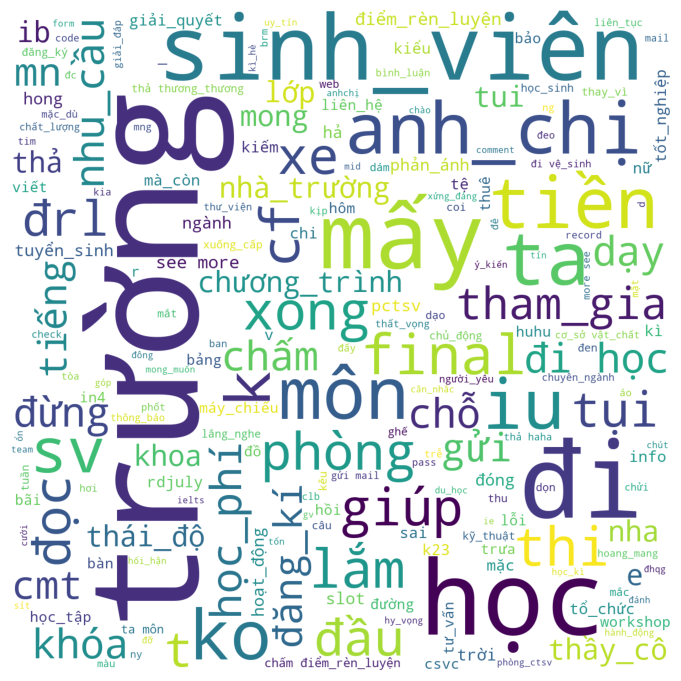

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


def remove_regex_patterns(text, regex_patterns):
    combined_pattern = "|".join(regex_patterns)
    filtered_text = re.sub(combined_pattern, "", text)
    return filtered_text


with open("backend/llm/vietnamese_stopwords.txt", "r", encoding="utf-8") as file:
    stopwords = set(file.read().splitlines())
df = pd.read_csv("results/csv/IU_CFS_posts.csv", encoding="utf-8")
patterns = [
    r"#iu_\w+",
    r"\d{2}/\d{2}/\d{4} \d{2}:\d{2}:\d{2}",
    r"[-~_][\w\s]*?[-~_]",
    r"[^\w\s]",
    r"sua dua",

]
fixed_words = ["phòng ctsv", "phòng công tác sinh viên", "đrl", "điểm rèn luyện", "trường đại học quốc tế"]
comment_words = ""
for val in df.content:
    val = val.lower()
    val = remove_regex_patterns(val, patterns)
    val = word_tokenize(val, format="text", fixed_words=fixed_words)
    tokens = val.split()
    # Join the filtered tokens
    comment_words += " ".join(tokens) + " "
    # print(comment_words)

wordcloud = WordCloud(
    width=1200,
    height=1200,
    background_color="white",
    stopwords=stopwords,
    min_font_size=4,
    font_step=2,
).generate(comment_words)

# Display WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=5)
plt.show()

In [7]:
tokens

['#',
 'iu_askandanswer #',
 'iu_askandanswer',
 '1',
 '.',
 '"',
 'chào',
 'anh chị',
 '.',
 'dự định',
 'trường',
 'học',
 '.',
 '/',
 'câu',
 'trường',
 'ngành',
 'logistic',
 'ko',
 '?',
 '*',
 '/',
 'nick',
 'face',
 'tiện',
 'trao đổi',
 'ko',
 '? anh',
 '/',
 'dấu',
 '“',
 '.',
 '”',
 'comment',
 'chủ động',
 'ib',
 '.',
 'trường',
 'hệ',
 'ngành',
 'logistic',
 '(',
 'hệ',
 'đại trà',
 ',',
 'hệ',
 'clc',
 '…',
 '?',
 ')',
 '…',
 'see',
 'more',
 'see',
 'more']

# Singular Extract

In [234]:
from backend.extractor.task.single_path_extractor import SingleElementExtractor


example_container = {
    "article": [
        "Bộ trưởng Tư pháp Lê Thành Long được Quốc hội phê chuẩn bổ nhiệm làm Phó thủ tướng nhiệm kỳ 2021-2026, chiều 6/6.",
        """Nghị quyết phê chuẩn đề nghị của Thủ tướng về việc bổ nhiệm Phó thủ tướng nhiệm kỳ 2021-2026 với ông Lê Thành Long thực hiện bằng hình thức biểu quyết điện tử. 468/469 đại biểu tham gia biểu quyết đã bấm nút "tán thành"""
    ]
}
single_extractor = SingleElementExtractor(example_container, vnexpress_html)

In [184]:
single_extractor.process_container

{'article': {'content': ['Nữ tài xế vừa rẽ sang đường thì một xe máy do nam tài xế điều khiển lao tới tông trúng đầu xe. Va chạm cực mạnh khiến nữ tài xế văng xuống đường, còn nam tài xế văng về phía trước hàng chục mét.',
   'Hình ảnh vụ tai nạn được chia sẻ trên nhóm Facebook về giao thông mới đây cho thấy, 2 tài xế sau khi bị hất văng xuống đường sau một hồi nằm dưới đường đã có thể đứng dậy di chuyển vào lề đường.']}}

In [ ]:
soup = prepare_html(html)

In [224]:
from backend.extractor.extractor import find_string_tag


tag = find_string_tag(
    soup=soup,
    navigable_string_content="Nữ tài xế vừa rẽ sang đường thì một xe máy do nam tài xế điều khiển lao tới tông trúng đầu xe. Va chạm cực mạnh khiến nữ tài xế văng xuống đường, còn nam tài xế văng về phía trước hàng chục mét.",
)
tag.attrs

2024-06-06 17:24:20,335 - extractor.py: find_string_tag(): 16:	Found string in soup at: <div class="tmp-title-large my-4"> Ná»¯ tÃ i xáº¿ vá»«a ráº½ sang ÄÆ°á»ng thÃ¬ má»t xe mÃ¡y do nam tÃ i xáº¿ Äiá»u khiá»n lao tá»i tÃ´ng trÃºng Äáº§u xe. Va cháº¡m cá»±c máº¡nh khiáº¿n ná»¯ tÃ i xáº¿ vÄng xuá»ng ÄÆ°á»ng, cÃ²n nam tÃ i xáº¿ vÄng vá» phÃ­a trÆ°á»c hÃ ng chá»¥c mÃ©t. </div>
--------


{'class': ['tmp-title-large', 'my-4']}

In [ ]:
def narrow_search(soup, target_tag, target_by=""):
    attributes = target_tag.attrs
    if "id" in attributes.keys():
        tag_id = "#" + attributes["id"]
    if "class" in attributes.keys():
        tag_class = ".".join(attributes["class"])
    
    if target_by == "id":
        selector = path
    

In [219]:
res = []
path = f"html body section div div div div div.tmp-title-large.my-4"
selector = path.replace(" ", " > ")

similar_tags = soup.select(selector)
string_values = (
    [tag.get_text().strip() for tag in similar_tags]
    if similar_tags is not None
    else ""
)
res.append(string_values)
res

[['Nữ tài xế vừa rẽ sang đường thì một xe máy do nam tài xế điều khiển lao tới tông trúng đầu xe. Va chạm cực mạnh khiến nữ tài xế văng xuống đường, còn nam tài xế văng về phía trước hàng chục mét.']]

In [235]:
single_extractor.extract_similar_text_from_example(vnexpress_soup, single_extractor.process_container["article"]["content"])

2024-06-06 17:34:48,136 - single_element_extractor.py: extract_similar_text_from_example(): 30:	Getting tags
--------
2024-06-06 17:34:48,144 - extractor.py: find_string_tag(): 16:	Found string in soup at: <p class="description">Bá» trÆ°á»ng TÆ° phÃ¡p LÃª ThÃ nh Long ÄÆ°á»£c Quá»c há»i phÃª chuáº©n bá» nhiá»m lÃ m PhÃ³ thá»§ tÆ°á»ng nhiá»m ká»³ 2021-2026, chiá»u 6/6.</p>
--------
2024-06-06 17:34:48,163 - extractor.py: find_string_tag(): 16:	Found string in soup at: <p class="Normal">Nghá» quyáº¿t phÃª chuáº©n Äá» nghá» cá»§a Thá»§ tÆ°á»ng vá» viá»c bá» nhiá»m PhÃ³ thá»§ tÆ°á»ng nhiá»m ká»³ 2021-2026 vá»i Ã´ng LÃª ThÃ nh Long thá»±c hiá»n báº±ng hÃ¬nh thá»©c biá»u quyáº¿t Äiá»n tá»­. 468/469 Äáº¡i biá»u tham gia biá»u quyáº¿t ÄÃ£ báº¥m nÃºt "tÃ¡n thÃ nh".</p>
--------
2024-06-06 17:34:48,165 - extractor.py: find_path(): 69:	Extract path name: html body section div div p
--------
2024-06-06 17:34:48,166 - extractor.py: find_path(): 69:	Extract path name: ht

<p class="description">Bộ trưởng Tư pháp Lê Thành Long được Quốc hội phê chuẩn bổ nhiệm làm Phó thủ tướng nhiệm kỳ 2021-2026, chiều 6/6.</p>
<p class="Normal">Nghị quyết phê chuẩn đề nghị của Thủ tướng về việc bổ nhiệm Phó thủ tướng nhiệm kỳ 2021-2026 với ông Lê Thành Long thực hiện bằng hình thức biểu quyết điện tử. 468/469 đại biểu tham gia biểu quyết đã bấm nút "tán thành".</p>
['html body section div div p', 'html body section div div article p']


[['Bộ trưởng Tư pháp Lê Thành Long được Quốc hội phê chuẩn bổ nhiệm làm Phó thủ tướng nhiệm kỳ 2021-2026, chiều 6/6.'],
 ['Nghị quyết phê chuẩn đề nghị của Thủ tướng về việc bổ nhiệm Phó thủ tướng nhiệm kỳ 2021-2026 với ông Lê Thành Long thực hiện bằng hình thức biểu quyết điện tử. 468/469 đại biểu tham gia biểu quyết đã bấm nút "tán thành".',
  'Ông Lê Thành Long 61 tuổi, quê thành phố Sầm Sơn, tỉnh Thanh Hóa, Tiến sĩ Luật. Ông là Ủy viên Trung ương Đảng khóa 12, 13; Đại biểu Quốc hội khóa 14, 15.',
  'Sau khi tốt nghiệp Cử nhân Luật tại Đại học tổng hợp Adecbaijan (Liên Xô cũ), ông Long bắt đầu sự nghiệp ở vị trí chuyên viên Vụ Hợp tác quốc tế, Bộ Tư pháp. Ông sau đó trải qua nhiều cương vị khác nhau ở Bộ Tư pháp như thư ký Bộ trưởng, Vụ trưởng Các vấn đề chung về xây dựng pháp luật, Thứ trưởng Tư pháp.',
  'Trong hơn một năm từ tháng 3/2014 đến 10/2015, ông Long làm Phó bí thư Tỉnh ủy Hà Tĩnh. Từ tháng 4/2016 đến nay, ông là Bí thư Ban cán sự Đảng, Bộ trưởng Tư pháp.',
  'Chính phủ 

In [105]:
article_contents = []
for path in paths:
    selector = path.replace(" ", " > ")
    similar_tags = cleaned_html.select(selector)
    string_values = (
        [tag.get_text().strip() for tag in similar_tags]
        if similar_tags is not None
        else ""
    )
    article_contents.append(string_values)

In [106]:
article_contents

[['Nghi phạm - quốc tịch Syria - được đưa đến bệnh viện cấp cứu và các binh sĩ đang kiểm tra hiện trường.',
  'Đại sứ quán Mỹ xác nhận thông tin có một vụ nổ súng gần lối vào. Tòa nhà và các nhân viên vẫn an toàn. Theo các nguồn tin ngoại giao, Đại sứ Mỹ Lisa Johnson đang công du nước ngoài.',
  'Một nguồn tin nói với Reuters rằng một nhân viên an ninh tại đại sứ quán đã bị thương trong vụ tấn công, và nghi phạm cũng bị thương ở bụng.',
  'Reuters đã xác minh hình ảnh của nghi phạm lan truyền trên mạng. Trên áo của nghi phạm có dòng chữ "Hồi giáo".',
  'Quyền Thủ tướng Li-băng Najib Mikati cho biết ông đang theo dõi vụ việc với bộ trưởng quốc phòng và lực lượng an ninh.',
  'Đại sứ quán Mỹ nằm ở Awkar, phía bắc Beirut trong một khu vực được bảo vệ nghiêm ngặt với nhiều trạm kiểm soát dọc theo lối vào. Đại sứ quán chuyển đến đó từ Beirut sau vụ tấn công tự sát năm 1983 khiến hơn 60 người thiệt mạng.',
  'Hồi tháng 9, có tiếng súng nổ gần đại sứ quán nhưng không có báo cáo về thương tích

In [25]:
import pandas as pd

dictionary = {}
df = pd.DataFrame({"col1": [1], "": [0.5]})

for col in df.columns:
    if col != "": 
        dictionary[col] = df[col].values.tolist()
# dictionary = dataframe.to_dict()

In [26]:
dictionary

{'col1': [1]}

In [11]:
df["col1"].values

array([1, 2])